In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("../data/nifty_model_features.csv")

df.head()


,Datetime,Close,High,Low,Open,Volume,EMA_5,EMA_15,Returns
0,2025-10-24 03:50:00+00:00,25886.000000,25892.400391,25840.400391,25851.150391,0.0,25862.533854,25855.200684,0.001362
1,2025-10-24 03:55:00+00:00,25886.400391,25893.300781,25859.500000,25886.300781,0.0,25870.489366,25859.100647,0.000015
2,2025-10-24 04:00:00+00:00,25875.400391,25887.599609,25864.500000,25885.849609,0.0,25872.126374,25861.138115,-0.000425
3,2025-10-24 04:05:00+00:00,25914.300781,25914.699219,25862.550781,25876.150391,0.0,25886.184510,25867.783448,0.001503
4,2025-10-24 04:10:00+00:00,25903.500000,25913.300781,25883.449219,25913.199219,0.0,25891.956340,25872.248017,-0.000417


In [2]:
df[["Close", "EMA_5", "EMA_15", "Returns"]].describe()


,Close,EMA_5,EMA_15,Returns
count,4251.000000,4251.000000,4251.000000,4251.000000
mean,25954.020499,25954.105887,25954.318909,-0.000001
std,198.188576,197.434088,195.831966,0.000570
min,25320.000000,25345.069075,25369.718639,-0.005545
25%,25830.399414,25830.902978,25833.523702,-0.000272
50%,25963.000000,25961.431574,25961.564831,0.000008
75%,26112.049805,26109.524545,26109.579984,0.000274
max,26367.699219,26356.191348,26346.714114,0.005104


baseline EMA strategy signals

In [3]:
df["Signal"] = 0
df.loc[df["EMA_5"] > df["EMA_15"], "Signal"] = 1

df.loc[df["EMA_5"] < df["EMA_15"], "Signal"] = -1

df["Signal"].value_counts()


Signal
-1    2145
 1    2106
Name: count, dtype: int64

Strategy Return

In [4]:
df["Strategy_Return"] = df["Signal"].shift(1) * df["Returns"]

df = df.dropna().reset_index(drop=True)

df[["Strategy_Return"]].head()


,Strategy_Return
0,0.000015
1,-0.000425
2,0.001503
3,-0.000417
4,-0.000784


Cumulative performance

In [5]:
df["Cumulative_Return"] = (1 + df["Strategy_Return"]).cumprod()

df[["Cumulative_Return"]].tail()


,Cumulative_Return
4245,0.987636
4246,0.986857
4247,0.986576
4248,0.985984
4249,0.986232


In [6]:
total_return = df["Cumulative_Return"].iloc[-1] - 1
win_rate = (df["Strategy_Return"] > 0).mean()

print(f"Total Return: {total_return:.2%}")
print(f"Win Rate: {win_rate:.2%}")


Total Return: -1.38%
Win Rate: 49.79%


baseline equity curve

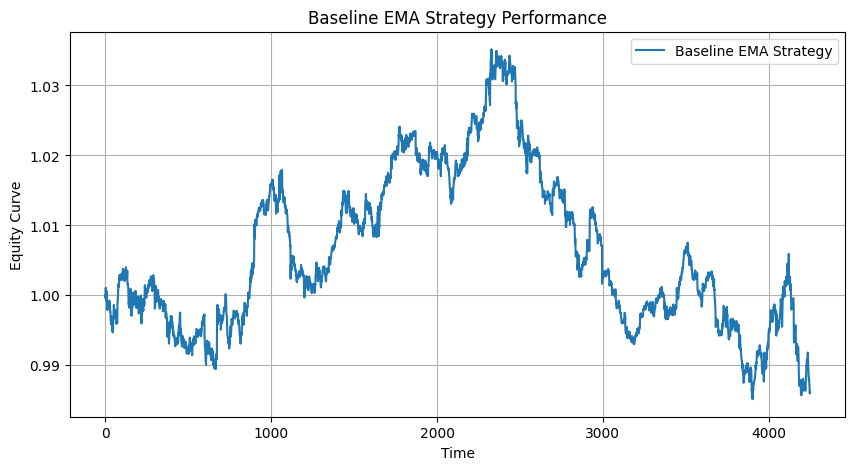

In [7]:
os.makedirs("../plots", exist_ok=True)

plt.figure(figsize=(10, 5))
plt.plot(df["Cumulative_Return"], label="Baseline EMA Strategy")
plt.xlabel("Time")
plt.ylabel("Equity Curve")
plt.title("Baseline EMA Strategy Performance")
plt.legend()
plt.grid(True)

plt.savefig("../plots/baseline_equity_curve.png", dpi=300, bbox_inches="tight")
plt.show()


In [8]:
df.to_csv("../data/baseline_strategy_results.csv", index=False)

print("Baseline strategy analysis completed successfully")


Baseline strategy analysis completed successfully


In [9]:
total_return = df["Cumulative_Return"].iloc[-1] - 1

max_drawdown = (
    df["Cumulative_Return"].cummax() - df["Cumulative_Return"]
).max()

sharpe_ratio = (
    df["Strategy_Return"].mean() /
    df["Strategy_Return"].std()
)

print("Total Return:", round(total_return, 4))
print("Max Drawdown:", round(max_drawdown, 4))
print("Sharpe Ratio:", round(sharpe_ratio, 4))


Total Return: -0.0138
Max Drawdown: 0.05
Sharpe Ratio: -0.0054
